In [1]:
#pip install --upgrade numpy==1.21.4

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load the Uber pickups data
uber_data = pd.read_csv('C:/Users/Sanchu/Downloads/Uber data/data-society-uber-pickups-in-nyc/uber-raw-data-sep14.csv', parse_dates=['Date/Time'])
uber_data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [3]:
uber_data['weekday'] = uber_data['Date/Time'].dt.weekday
uber_data['month'] = uber_data['Date/Time'].dt.month
uber_data['day'] = uber_data['Date/Time'].dt.day

In [4]:
# Preprocess the data
# Extract the hour and day of the week from the pickup_datetime column

uber_data['hour'] = uber_data['Date/Time'].dt.hour
uber_data['weekday'] = uber_data['Date/Time'].dt.weekday

# Create a pivot table to count the number of pickups per hour and day of the week
pivot_table = pd.pivot_table(uber_data, values='Base', index='hour', columns='weekday', aggfunc='count')

# Remove any NaN values
pivot_table = pivot_table.fillna(0)

# Standardize the data using the StandardScaler from scikit-learn
scaler = StandardScaler()
pivot_table_std = scaler.fit_transform(pivot_table)

# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(pivot_table_std)

In [5]:
pivot_table.columns = ["Monday", "Tuesday","Wednesday", "Thursday","Friday", "Saturday", "Sunday"]
pivot_table

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,1885,1411,1489,1762,2513,6909,8164
1,1201,784,885,1037,1530,4737,5933
2,977,609,597,714,1002,2957,3846
3,1780,1221,966,1088,1347,2029,2358
4,2479,2093,1612,1720,1819,1458,1494
5,3905,4196,3130,2754,3115,1544,1618
6,5668,7393,5699,5586,5186,2092,1683
7,7223,9466,7067,7790,6698,2790,2280
8,7287,9374,6665,7663,6715,3664,3109


In [6]:
# Perform k-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
cluster_labels = kmeans.fit_predict(cosine_sim_matrix)

# Add the cluster labels to the original pivot table
pivot_table['cluster'] = cluster_labels

# Output the results
print("Number of pickups in each cluster:")
print(pivot_table.groupby('cluster').sum())

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of pickups in each cluster:
         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
cluster                                                                
0         28461    28889      23646     26094   27299     36681   39246
1         79821    98070      83532     94649   99501    102066   63973
2         29006    36271      28195     32533   33580     23310   13313


In [7]:
# Perform k-means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
cluster_labels = kmeans.fit_predict(cosine_sim_matrix)

# Add the cluster labels to the original pivot table
pivot_table['cluster'] = cluster_labels

# Output the results
print("Number of pickups in each cluster:")
print(pivot_table.groupby('cluster').sum())

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of pickups in each cluster:
         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
cluster                                                                
0         14510    18840      13732     15453   13413      6454    5389
1         14499    14636      11234     11931   12638     13120   14004
2         79821    98070      83532     94649   99501    102066   63973
3         13962    14253      12412     14163   14661     23561   25242
4         14496    17431      14463     17080   20167     16856    7924


In [8]:
# Perform k-means clustering
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
cluster_labels = kmeans.fit_predict(cosine_sim_matrix)

# Add the cluster labels to the original pivot table
pivot_table['cluster'] = cluster_labels

# Output the results
print("Number of pickups in each cluster:")
print(pivot_table.groupby('cluster').sum())

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of pickups in each cluster:
         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
cluster                                                                
0         14499    14636      11234     11931   12638     13120   14004
1         73576    90991      77699     88281   93263     95017   57743
2         14510    18840      13732     15453   13413      6454    5389
3         13962    14253      12412     14163   14661     23561   25242
4          2936     2956       3408      5164    9366     10412    2326
5         11560    14475      11055     11916   10801      6444    5598
6          6245     7079       5833      6368    6238      7049    6230


In [9]:
# Perform k-means clustering
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
cluster_labels = kmeans.fit_predict(cosine_sim_matrix)

# Add the cluster labels to the original pivot table
pivot_table['cluster'] = cluster_labels

# Output the results
print("Number of pickups in each cluster:")
print(pivot_table.groupby('cluster').sum())

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of pickups in each cluster:
         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
cluster                                                                
0         68446    84453      71520     80396   82466     83844   53628
1          2178     1393       1482      1751    2532      7694    9779
2         14510    18840      13732     15453   13413      6454    5389
3         13522    14027      10637     11217   11636     10163   10158
4          2936     2956       3408      5164    9366     10412    2326
5          6245     7079       5833      6368    6238      7049    6230
6          5130     6538       6179      7885   10797     11173    4115
7         11560    14475      11055     11916   10801      6444    5598
8         12761    13469      11527     13126   13131     18824   19309


In [10]:
# Perform k-means clustering
num_clusters = 11
kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
cluster_labels = kmeans.fit_predict(cosine_sim_matrix)

# Add the cluster labels to the original pivot table
pivot_table['cluster'] = cluster_labels

# Output the results
print("Number of pickups in each cluster:")
print(pivot_table.groupby('cluster').sum())

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of pickups in each cluster:
         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
cluster                                                                
0         24972    29417      24649     26502   25919     29083   21544
1         13522    14027      10637     11217   11636     10163   10158
2         14510    18840      13732     15453   13413      6454    5389
3          2178     1393       1482      1751    2532      7694    9779
4         11560    14475      11055     11916   10801      6444    5598
5          6245     7079       5833      6368    6238      7049    6230
6          2936     2956       3408      5164    9366     10412    2326
7          1885     1411       1489      1762    2513      6909    8164
8          5130     6538       6179      7885   10797     11173    4115
9         10876    12058      10038     11364   10618     11915   11145
10        43474    55036      46871     53894   56547     54761   32084


In [11]:
# Perform k-means clustering
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
cluster_labels = kmeans.fit_predict(cosine_sim_matrix)

# Add the cluster labels to the original pivot table
pivot_table['cluster'] = cluster_labels

# Output the results
print("Number of pickups in each cluster:")
print(pivot_table.groupby('cluster').sum())

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of pickups in each cluster:
         Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
cluster                                                                
0          2757     1830       1563      1802    2349      4986    6204
1         27700    33412      28076     30385   29663     31372   22208
2         11560    14475      11055     11916   10801      6444    5598
3          2936     2956       3408      5164    9366     10412    2326
4         14510    18840      13732     15453   13413      6454    5389
5         10876    12058      10038     11364   10618     11915   11145
6          6245     7079       5833      6368    6238      7049    6230
7          6384     6289       4742      4474    4934      3002    3112
8          5130     6538       6179      7885   10797     11173    4115
9          6979     9022       7951      9820   10947     10723    5164
10         5358     6517       4929      5655    5355      5132    4688
11         7113     8374     

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

Optimal k value: 7


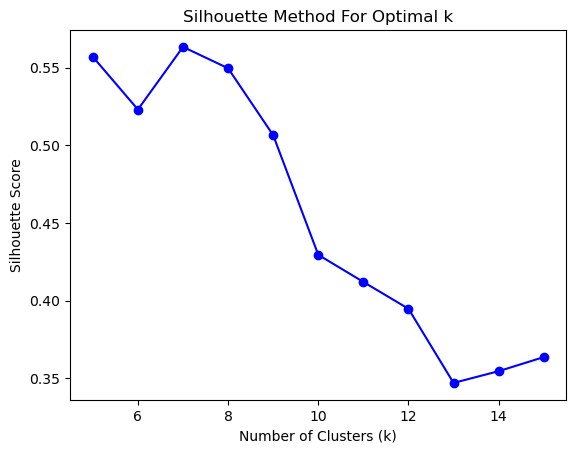

In [12]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Define the range of k values to test
k_min = 5
k_max = 15
k_values = range(k_min, k_max+1)

# Calculate the silhouette scores for each k value
silhouette_scores = []
for k in k_values:
    # Fit the k-means model
    kmeans_model = KMeans(n_clusters=k , max_iter=100)
    labels = kmeans_model.fit_predict(cosine_sim_matrix)
    
    # Calculate the silhouette score
    score = silhouette_score(cosine_sim_matrix, labels)
    silhouette_scores.append(score)

# Find the optimal k value with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal k value:", optimal_k)

# Plot the silhouette scores for each k value
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()


In [13]:
clust_data = uber_data[['Lat','Lon']]
clust_data.shape

(1028136, 2)

In [14]:
kmeans = KMeans(n_clusters = 3, max_iter = 100 , random_state = 12345)
c_labels = kmeans.fit(clust_data)

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


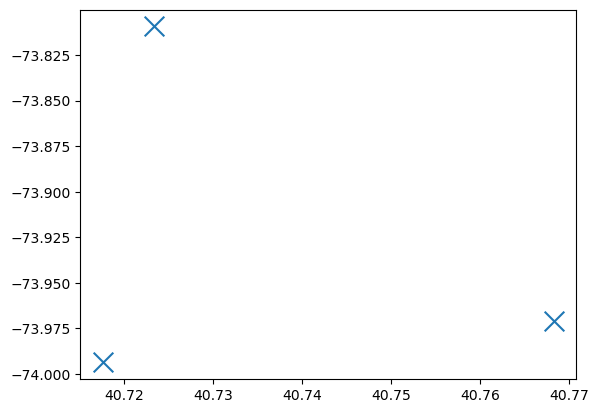

In [15]:
centroids = kmeans.cluster_centers_
clocation = pd.DataFrame(centroids)
clocation.columns = ['Latitude','Longitude']
clocation
plt.scatter(clocation['Latitude'],clocation['Longitude'],marker = "x", s = 200)
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 5, max_iter = 100 , random_state = 12345)
c_labels = kmeans.fit(clust_data)

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


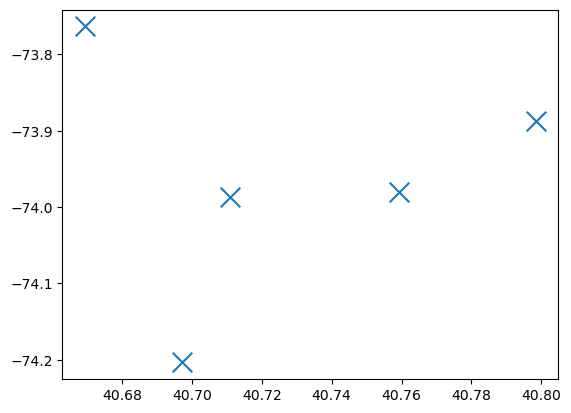

In [17]:
centroids = kmeans.cluster_centers_
clocation = pd.DataFrame(centroids)
clocation.columns = ['Latitude','Longitude']
clocation
plt.scatter(clocation['Latitude'],clocation['Longitude'],marker = "x", s = 200)
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 9, max_iter = 100 , random_state = 12345)
c_labels = kmeans.fit(clust_data)

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


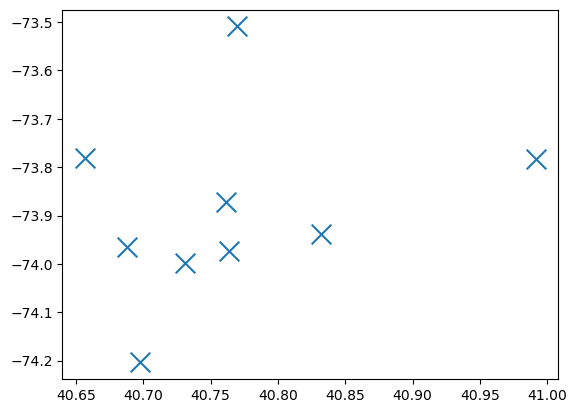

In [19]:
centroids = kmeans.cluster_centers_
clocation = pd.DataFrame(centroids)
clocation.columns = ['Latitude','Longitude']
clocation
plt.scatter(clocation['Latitude'],clocation['Longitude'],marker = "x", s = 200)
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 7, max_iter = 100 , random_state = 12345)
c_labels = kmeans.fit(clust_data)

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
centroids = kmeans.cluster_centers_
clocation = pd.DataFrame(centroids)
clocation.columns = ['Latitude','Longitude']
clocation

,Latitude,Longitude
0,40.731783,-73.997787
1,40.660078,-73.785042
2,40.794761,-73.880433
3,40.831504,-73.567281
4,40.767403,-73.971675
5,40.697407,-74.203735
6,40.687945,-73.963972


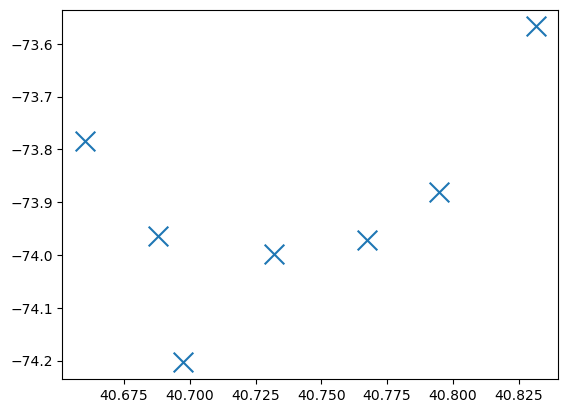

In [22]:
plt.scatter(clocation['Latitude'],clocation['Longitude'],marker = "x", s = 200)
plt.show()

In [23]:
import folium as folium 
# Converting centroid into lists
centroid = clocation.values.tolist()
# Plotting the centroids on google map using Folium library.
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 25)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(map)
map

In [24]:
# Fit the k-means model
k = 7
kmeans_model = KMeans(n_clusters=k)
c_label = kmeans_model.fit_predict(clust_data)

C:\Users\Sanchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Plotting the centroids on google map using Folium library.
map1 = folium.Map(location=[40.7128, -74.0060], zoom_start = 12)
# Add the clustered data to the map
colors = ['red', 'blue', 'green', 'purple', 'orange','black','pink']
for lat, lon, label in zip(clust_data['Lat'], clust_data['Lon'], c_label):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=colors[label],
        fill=True,
        fill_color=colors[label],
        fill_opacity=0.7,
    ).add_to(map)
    
# Display the map
map1